## Colabs / Apuntes

correlación ->
https://colab.research.google.com/drive/14LvYgnmh95C5u23fl1bW_Ct-a5_JGOy1?authuser=5#scrollTo=ec6UrovRcDv4

pairPlot ->
https://colab.research.google.com/drive/13h-FRA3S9LQ9oGXbHrlEexo8OonQb36u?authuser=5#scrollTo=KA97UsQI8w-p

confusión ->
https://colab.research.google.com/drive/1YfUwN5NCEooPOWuiwIJnKSWoh8eoTK8v?authuser=5#scrollTo=U3NndF5kc9X5

https://colab.research.google.com/drive/1f8cKxSVCDcTqYWqsaJj4Hu5FmJFgH-en?authuser=5#scrollTo=v87bfMnlOxqj

naiveBayes ->
https://colab.research.google.com/drive/1YB-zjVqfNqH23xTbGHZbnr--3aCSj6kE?authuser=5#scrollTo=wpd-FeBm3CKo

crossvalidation -> https://colab.research.google.com/drive/1YB-zjVqfNqH23xTbGHZbnr--3aCSj6kE#scrollTo=wpd-FeBm3CKo

Knn Clasificación -> https://colab.research.google.com/drive/13OxWMcG29nu2azQaE6jFy_CA8rKXM_3d?authuser=5

Knn Regresión -> https://colab.research.google.com/drive/1PUPhjokFgDhXj4BtNVRwr_BJd607Z2Ln?authuser=5

Knn evaluación -> https://colab.research.google.com/drive/1y1I_7eWWw-vPRyX7eXZBRHE_t3Qwo79H?authuser=5#scrollTo=ATbs-xC-SbvB

# Problema y DataSet

Este dataSet trata sobre el coste personal médico, es decir, tenemos diferentes datos de diferentes personas:

(Edad, sexo, índice de masa corporal, cantidad de hijos, si es fumador, la región y el coste del seguro)

Con estos datos quiero predecir el coste del seguro según los datos introducidos. Por lo que estamos ante un modelo de **Regresión Lineal**

DataSet
https://www.kaggle.com/datasets/mirichoi0218/insurance

## Preparación - Imports de librerias


In [ ]:
# carga de datos
import pandas as pd
import io
from google.colab import files
from google.colab import drive
# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
# NaiveBayes
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB
# Escalamiento
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler  # Para el escalamiento Estandarización Z
from sklearn.preprocessing import MinMaxScaler    # Para el escalamiento por Rangos
from sklearn.compose import make_column_selector
# Knn
from sklearn.neighbors import KNeighborsRegressor   #Regresión
from sklearn.neighbors import KNeighborsClassifier  #Clasificación
from sklearn.model_selection import cross_val_score #Valor máx de Cross Validation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Exportar/importar el modelo
import sklearn.externals
import joblib
import pickle #Otra librería para exportar
# matriz de Confusión
#from sklearn.metrics import plot_confusion_matrix

# 2. Importación del dataSet

### Carga manual desde Local

En primer lugar cargamos los datos dentro del entorno con las funcionalidades que nos permite Google Colab

In [ ]:
def upload_files ():
  #Lee el archivo desde local
  uploaded = files.upload()

  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    #Crea el dataFrame separado por ";"
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), sep=',')
    return df

In [ ]:
train_insurance = upload_files()
train_insurance.head()

Saving insurance.csv to insurance.csv
User uploaded file "insurance.csv" with length 55628 bytes


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Carga desde Drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


#### Creamos el DataFrame (separando por ' ; ')

In [ ]:
train_insurance = pd.read_csv(f'/content/drive/MyDrive/SNS - Sistemas de aprendizaje automático/\
T 3 - Algoritmos y herramientas para el aprendizaje supervisado/\
Proyecto 01/insurance.csv', sep=',')
train_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 3. Ajuste de datos

## Transformación de categorical a numerical

In [ ]:
#Identifico cuáles son los valores diferentes en "region"
train_insurance["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
#Forma 1
train_insurance['sex'].replace(['female','male'],[1, 2], inplace=True)
train_insurance['region'].replace(['northeast','northwest','southeast','southwest'],[1, 2, 3, 4], inplace=True)
train_insurance['smoker'].replace(['no','yes'],[0, 1], inplace=True)

In [ ]:
#Forma 2
replacement = {'sex': {'female': 1, 'male': 2},
               'region': {'northeast': 1, 'northwest': 2, 'southeast': 3, 'southwest': 4},
               'smoker': {'no':0, 'yes':1}}
train_insurance.replace(replacement, inplace=True)

In [ ]:
train_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,4,16884.92400
1,18,2,33.770,1,0,3,1725.55230
2,28,2,33.000,3,0,3,4449.46200
3,33,2,22.705,0,0,2,21984.47061
4,32,2,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,2,30.970,3,0,2,10600.54830
1334,18,1,31.920,0,0,1,2205.98080
1335,18,1,36.850,0,0,3,1629.83350
1336,21,1,25.800,0,0,4,2007.94500


## Escalamiento de datos

In [ ]:
"""#Escala TODOS los datos
scaler = StandardScaler()
scaled_df = scaler.fit_transform(train_insurance.select_dtypes(include=['float64','int64']))
#crea al dataFrame escalado
df_scaled2 = pd.DataFrame(scaled_df columns=train_insurance.select_dtypes(include=['float64','int64']).columns.to_list())
"""

In [ ]:
new_sacaled_df = train_insurance
#Escala los datos necesarios del DataFrame
scaler = StandardScaler()
new_sacaled_df['age'] = scaler.fit_transform(train_insurance[['age']])
new_sacaled_df['bmi'] = scaler.fit_transform(train_insurance[['bmi']])
new_sacaled_df['region'] = scaler.fit_transform(train_insurance[['region']])

In [ ]:
new_sacaled_df

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,1,-0.453320,0,1,1.343905,16884.92400
1,-1.509965,2,0.509621,1,0,0.438495,1725.55230
2,-0.797954,2,0.383307,3,0,0.438495,4449.46200
3,-0.441948,2,-1.305531,0,0,-0.466915,21984.47061
4,-0.513149,2,-0.292556,0,0,-0.466915,3866.85520
...,...,...,...,...,...,...,...
1333,0.768473,2,0.050297,3,0,-0.466915,10600.54830
1334,-1.509965,1,0.206139,0,0,-1.372326,2205.98080
1335,-1.509965,1,1.014878,0,0,0.438495,1629.83350
1336,-1.296362,1,-0.797813,0,0,1.343905,2007.94500


### Histograma sin escalar

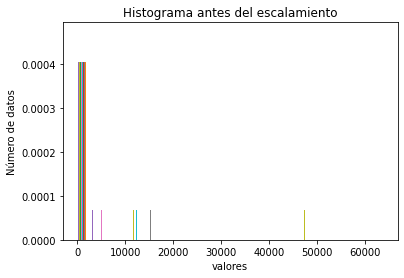

In [ ]:
#Datos SIN Escalar
plt.hist(train_insurance, density=True, bins=30)
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Histograma antes del escalamiento')
plt.show()

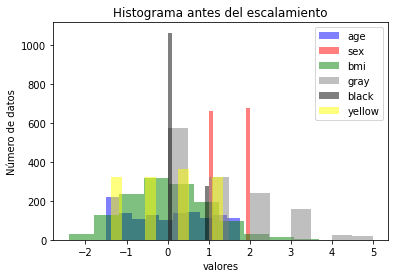

In [ ]:
#Datos SIN Escalar
plt.hist(train_insurance['age'], color = 'blue', alpha=.5, label='age')
plt.hist(train_insurance['sex'], color = 'red', alpha=.5, label='sex')
plt.hist(train_insurance['bmi'], color = 'green', alpha=.5, label='bmi')
plt.hist(train_insurance['children'], color = 'gray', alpha=.5, label='gray')
plt.hist(train_insurance['smoker'], color = 'black', alpha=.5, label='black')
plt.hist(train_insurance['region'], color = 'yellow', alpha=.5, label='yellow')
#plt.hist(train_insurance['charges'], color = 'brown', alpha=.5, label='charges')
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Histograma antes del escalamiento')
plt.legend()
plt.show()

### Histograma Escalado con Standard Scaler

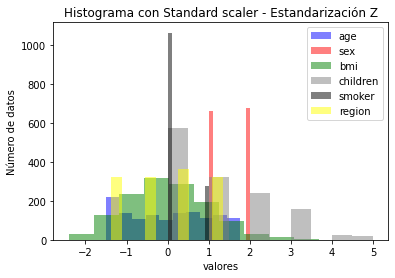

In [ ]:
#Datos Escalados con Standard Scaler
#plt.hist(df_escaled, 50)
plt.hist(new_sacaled_df['age'], color = 'blue', alpha=.5, label='age')
plt.hist(new_sacaled_df['sex'], color = 'red', alpha=.5, label='sex')
plt.hist(new_sacaled_df['bmi'], color = 'green', alpha=.5, label='bmi')
plt.hist(new_sacaled_df['children'], color = 'gray', alpha=.5, label='children')
plt.hist(new_sacaled_df['smoker'], color = 'black', alpha=.5, label='smoker')
plt.hist(new_sacaled_df['region'], color = 'yellow', alpha=.5, label='region')
#plt.hist(new_sacaled_df['charges'], color = 'lightblue', alpha=.5, label='charges')
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Histograma con Standard scaler - Estandarización Z')
plt.legend()
plt.show()

# 4. Selección de variables para el entrenamiento

## Matriz de Correlación de variables

**Podemos ver que los valores Escalados y sin Escalar son los mismos**

**y las variables que tienen mejor correlación son "bmi" con "age" y "region"**

### Sin escalar

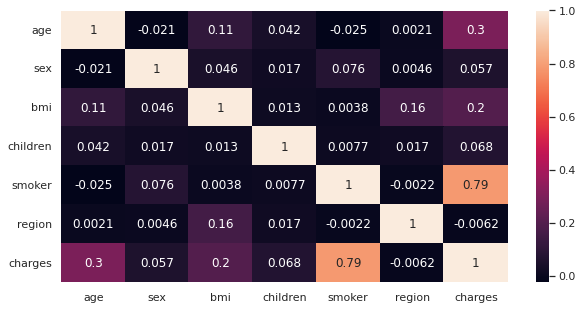

In [ ]:
sns.set()
fig, ax = plt.subplots(figsize=(10, 5)) #Tamaño
sns.heatmap(train_insurance.corr(), square=False, annot=True)

#### DataFrame Sin Charges

In [ ]:
df_charges = train_insurance.drop(columns=['charges'])
df_charges.head()

,age,sex,bmi,children,smoker,region
0,-1.438764,1,-0.453320,0,1,1.343905
1,-1.509965,2,0.509621,1,0,0.438495
2,-0.797954,2,0.383307,3,0,0.438495
3,-0.441948,2,-1.305531,0,0,-0.466915
4,-0.513149,2,-0.292556,0,0,-0.466915


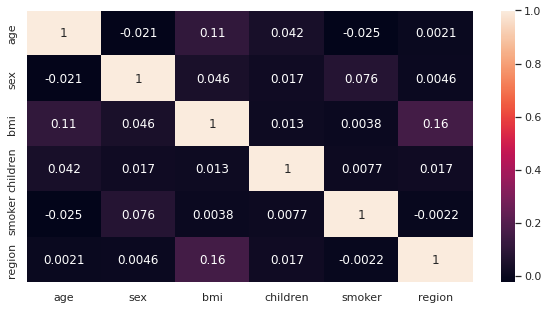

In [ ]:
sns.set()
fig, ax = plt.subplots(figsize=(10, 5)) #Tamaño
sns.heatmap(df_charges.corr(), square=False, annot=True)

In [ ]:
df_charges.corr()

,age,sex,bmi,children,smoker,region
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000


### Escalado

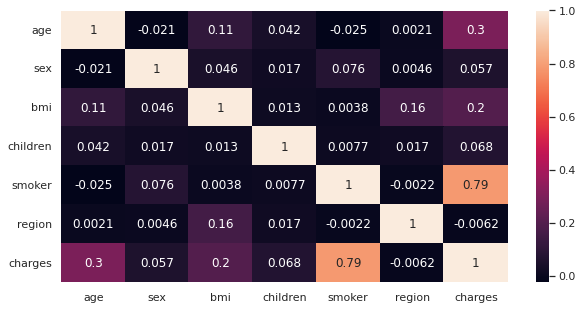

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5)) #Tamaño
sns.heatmap(new_sacaled_df.corr(), square=False, annot=True)

## Comparativa por pares de Variables (sns.pairplot)

**Al igual que en la matriz de correlación, los valores Escalados y sin Escalar son los mismos**

**Podemos comprobar que el "bmi" con "age" tiene bastante correlación.**

**Pero el "bmi" con "region" no tiene más correlación que el resto, al contrario de lo que indicaba la matriz de correlación**

### Sin escalar

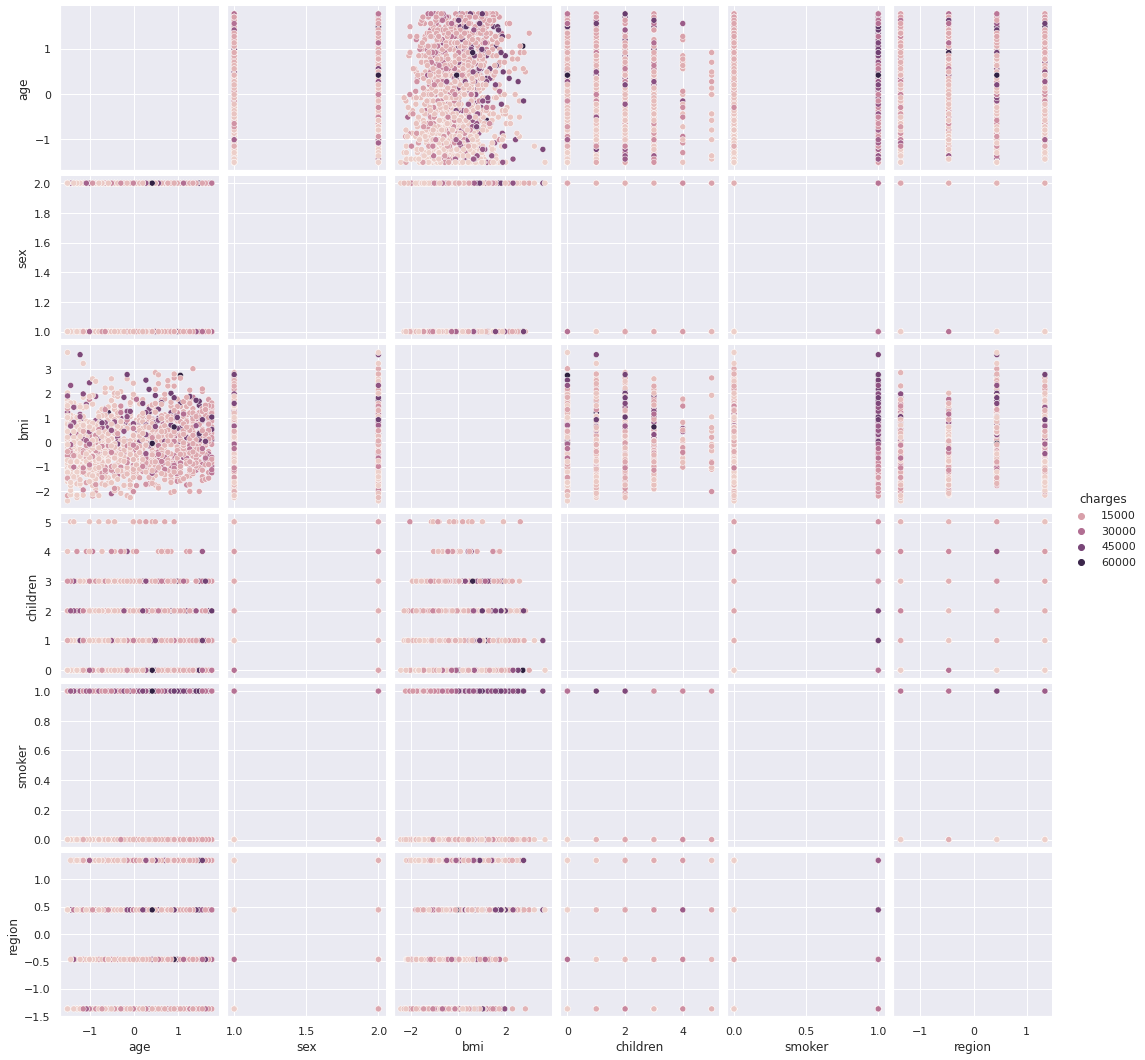

In [ ]:
sns.pairplot(train_insurance, hue="charges") # Con el parámetro hue indicamos la variable por la que se agruparán los datos

### Escalado

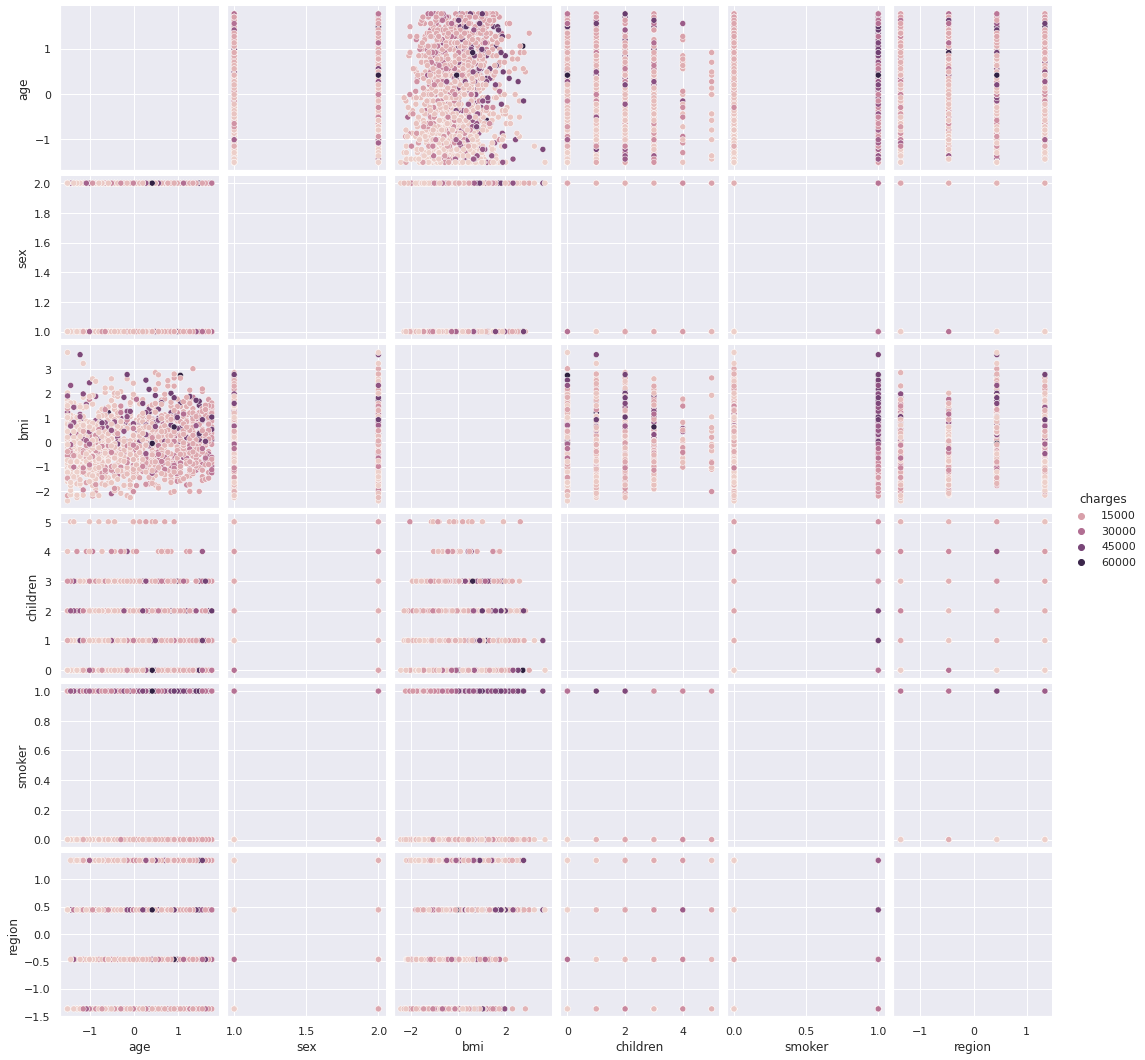

In [ ]:
sns.pairplot(new_sacaled_df, hue="charges") # Con el parámetro hue indicamos la variable por la que se agruparán los datos

## Selección de variables

In [ ]:
selected_features = ['bmi', 'age', 'region']

# 5. Comparar al menos 2 modelos con Cross Validation y seleccionar el mejor

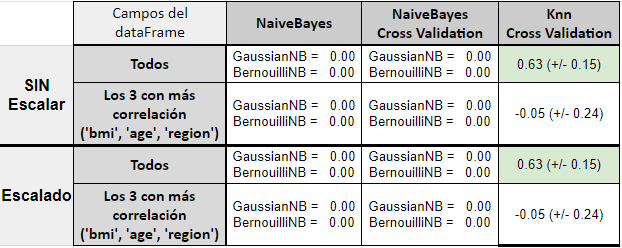

**Podemos ver como las predicciones son las mismas tanto con datos Escalados como NO Escalados**

**Vemos que los modelos de NaiveBayes no son buenos para este modelo de Regresión**

**Por lo que para este caso usaremos el modelo KNN**

## Predicciones **Erróneas**

Estos son los datos que daban antes con el Escalado antiguo que estaba mal

(estaba escalando los datos pasados a numéricos algo que no tiene sentido)
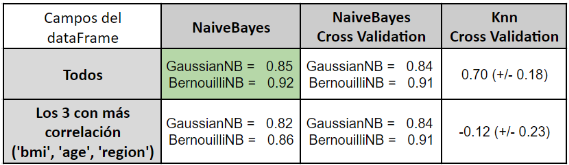

**Podemos comprobar que los mejores resultados los dan los modelos con todos los campos del dataFrame(sin el que vamos a predecir)**

**Aunque no es lo que me esperaba, los mejores resultados los da los da NaiveBayes sin Cross Validation. El Knn no lo mejora**

**En concreto el modelo que da mejores resultados es BernouilliNB SIN Cross Validation**

## Comparativa de Precisión con todos los campos

### Separamos datos de entrada y salida

#### Sin Escalar ---- Ejecuta la siguiente celda para probar el modelo **SIN Escalar** los datos

In [ ]:
#Sin escalar
from sklearn.model_selection import train_test_split

X_insurance = train_insurance.drop('charges', axis=1)
y_insurance = train_insurance['charges'].astype('int')

# Divide los datos entre train y test
X_train, X_test, y_train, y_test = train_test_split(X_insurance, y_insurance, test_size=0.33, random_state=5)

NameError: ignored

#### Escalado ---- Ejecuta la siguiente celda para probar el modelo con los datos **Escalados**

In [ ]:
# Escalado
from sklearn.model_selection import train_test_split

X_insurance = new_sacaled_df.drop('charges', axis=1)
y_insurance = new_sacaled_df['charges'].astype('int')

# Divide los datos entre train y test
X_train, X_test, y_train, y_test = train_test_split(X_insurance, y_insurance, test_size=0.33, random_state=5)


### NaiveBayes

Debido a que tengo datos negativos por Escalar los datos, no uso los modelos: MultiNomialNB, ComplementNB y CategoricalNB

**Aunque lo normal es que la predicción sea mejor con Cross Validation, es peor por un punto en ambos modelos**

##### Modelos a usar

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB

# classifiers
names = ["GaussianNB", 'BernouilliNB']
classifiers = [GaussianNB(), BernoulliNB()]

##### SIN Cross Validation

In [ ]:
for name, clf in zip(names, classifiers):

  # FIT THE MODEL
  clf.fit(X_train, y_train)
  # PREDIT AND SCORE
  score = clf.score(X_test, y_test) #Returns the mean accuracy on the given test data and labels.
  print ("Modelo: %s = %6.2f" % (name, score))

##### Con Cross Validation

In [ ]:
from sklearn.model_selection import KFold
cv = KFold(n_splits = 5, shuffle = True) # shuffle = False si hay dimensión temporal
total_scores = []
for name, clf in zip(names, classifiers):
  fold_accuracy = []
  for train_fold, test_fold in cv.split(X_train):
    # División train test aleatoria
    f_train_x = X_train.iloc[train_fold]           # Extrae la información (iloc), atendiendo a los indices obtenidos por CrossValidation
    f_train_y = y_train.iloc[train_fold]
    # entrenamiento y ejeución del modelo
    clf.fit(f_train_x, f_train_y)
    # Realizamos la predicción (Final evaluation) y guardamos la precisión para calcular la media posteriormente
    y_pred = clf.predict(X_train.iloc[test_fold])
    # evaluación del modelo
    acc = accuracy_score(y_train.iloc[test_fold], y_pred)
    fold_accuracy.append(acc)
  total_scores.append(sum(fold_accuracy)/len(fold_accuracy))

for i in range(len(names)):
  print ("Modelo: %s = %6.2f" % (names[i], total_scores[i]))

### KNN

In [ ]:
# especifica el número de divisiones (folds) que se utilizarán en la validación cruzada
crossV = KFold(n_splits = 10, shuffle = False) # Cross validation

# Crear el objeto del modelo KNN  con los n vecinos más cercanos
knn = KNeighborsRegressor(n_neighbors = 5)

# Utilizar cross_val_score para evaluar el rendimiento del modelo
scores = cross_val_score(knn, X_train, y_train, cv=crossV)

# Imprimir la precisión promedio y la desviación estándar
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

## Comparativa de Precisión con las variables de entrenamiento 'bmi', 'age', 'region'

### Separamos los datos de entrada y salida

(con los datos de entrada seleccionados según la mayor correlación)

#### Sin Escalar ---- Ejecuta la siguiente celda para probar el modelo SIN Escalar los datos

In [ ]:
#Vuelvo a dividir el dataFrame con la variables que quiero (Personalizadas)
X_insuranceP = train_insurance[selected_features]
y_insurance = train_insurance['charges'].astype('int')

# Divide los datos entre train y test
X_trainP, X_testP, y_trainP, y_testP = train_test_split(X_insuranceP, y_insurance, test_size=0.33, random_state=5)

#### Escalado ---- Ejecuta la siguiente celda para probar el modelo con los datos **Escalados**

In [ ]:
#Vuelvo a dividir el dataFrame con la variables que quiero (Personalizadas)
X_insuranceP = new_sacaled_df[selected_features]
y_insurance = new_sacaled_df['charges'].astype('int')

# Divide los datos entre train y test
X_trainP, X_testP, y_trainP, y_testP = train_test_split(X_insuranceP, y_insurance, test_size=0.33, random_state=5)

### NaiveBayes SIN Cross Validation


In [ ]:
for name, clf in zip(names, classifiers):

  # FIT THE MODEL
  clf.fit(X_trainP, y_trainP)
  # PREDIT AND SCORE
  score = clf.score(X_testP, y_testP) #Returns the mean accuracy on the given test data and labels.
  print ("Modelo: %s = %6.2f" % (name, score))

Modelo: GaussianNB =   0.00
Modelo: BernouilliNB =   0.00


### NaiveBayes CON Cross Validation

In [ ]:
from sklearn.model_selection import KFold
cv = KFold(n_splits = 5, shuffle = True) # shuffle = False si hay dimensión temporal
total_scores = []
for name, clf in zip(names, classifiers):
  fold_accuracy = []
  for train_fold, test_fold in cv.split(X_trainP):
    # División train test aleatoria
    f_train_x = X_train.iloc[train_fold]           # Extrae la información (iloc), atendiendo a los indices obtenidos por CrossValidation
    f_train_y = y_train.iloc[train_fold]
    # entrenamiento y ejeución del modelo
    clf.fit(f_train_x, f_train_y)
    # Realizamos la predicción (Final evaluation) y guardamos la precisión para calcular la media posteriormente
    y_predP = clf.predict(X_train.iloc[test_fold])
    # evaluación del modelo
    acc = accuracy_score(y_train.iloc[test_fold], y_predP)
    fold_accuracy.append(acc)
  total_scores.append(sum(fold_accuracy)/len(fold_accuracy))

for i in range(len(names)):
  print ("Modelo: %s = %6.2f" % (names[i], total_scores[i]))

Modelo: GaussianNB =   0.00
Modelo: BernouilliNB =   0.00


### KNN

In [ ]:
# especifica el número de divisiones (folds) que se utilizarán en la validación cruzada
crossValP = KFold(n_splits = 10, shuffle = False) # Cross validation

# Crear el objeto del modelo KNN  con los n vecinos más cercanos
knnP = KNeighborsRegressor(n_neighbors = 5)

# Utilizar cross_val_score para evaluar el rendimiento del modelo
scoresP = cross_val_score(knnP, X_trainP, y_trainP, cv=crossValP)

# Imprimir la precisión promedio y la desviación estándar
print("Accuracy: %0.2f (+/- %0.2f)" % (scoresP.mean(), scoresP.std() * 2))

Accuracy: -0.05 (+/- 0.24)


# 6.

## 6. a. **Entrenarlo** y obtener la **matriz de confusión**

Como es un modelo de Regresión, no usaré una matriz de confusión sino una matriz de **Dispersión**

### Entrenamiento del Modelo **MAL**(Antiguo, con BernoulliNB)

In [ ]:
"""# 1. elegimos clasificador
from sklearn.naive_bayes import BernoulliNB
# 2. instanciamos el modelo
model = BernoulliNB()
# 3. Entrenamiento con los datos
model.fit(X_train, y_train)"""

In [ ]:
"""# 4. Predicción con nuevos datos    y_model == y_predict
y_model = model.predict(X_test)
y_model"""

In [ ]:
"""# 5 evaluación
# Compara si los resultados obtenidos por el modelo (y_model) coinciden con los datos y_test esperados
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model) # Precisión del modelo"""

### Entrenamiento del modelo KNN con Cross Validation

In [ ]:
# Definimos los paramétros
k = 3         #nº de vecinos
w = "uniform" #Pesos

# especifica el número de divisiones (folds) que se utilizarán en la validación cruzada
crossV = KFold(n_splits = 10, shuffle = False) # Cross validation

# 1. Instanciar el modelo
model = KNeighborsRegressor(k, weights=w)

# 2. Entrenamiento del modelo usando Cross Validation
scores = cross_val_score(model, X_train, y_train, cv=crossV)

# 3. Muestra la precisión y la desviación estandar
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# 4. Entrenamiento del modelo con todo el dataset
model.fit(X_train, y_train)


Accuracy: 0.65 (+/- 0.13)


KNeighborsRegressor(n_neighbors=3)

In [ ]:
# 5. Predicción
y_model = model.predict(X_test)

# 6. Obtenemos la calidad de los resultados obtenidos (error cuadrático medio)
mse = mean_squared_error(y_test, y_model)
print("Error cuadrático medio: ", mse)

Error cuadrático medio:  38032747.88536953


### Evaluación del modelo

In [ ]:
"""# model evaluation for testing set
from sklearn import metrics
mae = metrics.mean_absolute_error(y_train, y_model)
mse = metrics.mean_squared_error(y_train, y_model)
mape = metrics.mean_absolute_percentage_error(y_train,y_model)
r2 = metrics.r2_score(y_train, y_model)

print("Rendimiento del Modelo")
print("--------------------------------------")
print('MAE = {}'.format(mae)) # El mejor valor obtenido sería 0.0
print('MSE = {}'.format(mse)) # El mejor valor obtenido sería 0.0
print('MAPE = {}'.format(mape)) # El mejor valor obtenido sería 0.0
print('R2 =  {}'.format(r2)) # La mejor puntuación posible obtenida sería 1"""

### Matriz de Dispersión

Text(0, 0.5, 'Predicted price ($1000s)')

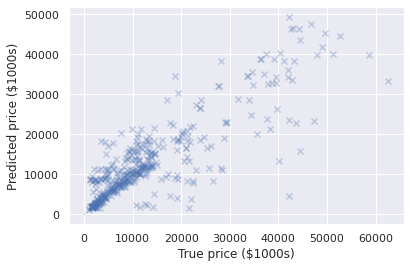

In [ ]:
#plt.scatter(y_test, y_model , alpha = 0.3)
plt.scatter(y_test, y_model , alpha = 0.3, marker = 'x')
plt.plot([0, 50], [0, 50], "--k")
plt.axis("tight")
plt.xlabel("True price ($1000s)")
plt.ylabel("Predicted price ($1000s)")

## 6. b. **Exportar** a un fichero los parámetros del modelo entrenado

In [ ]:
# Si tenemos dificultades con la librería joblib la podemos importar
!pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Para exportar el modelo a un fichero
joblib.dump(model,'Proyecto_01_modelo_entrenado.pkl')

['Proyecto_01_modelo_entrenado.pkl']

## 6. c. **Importar** los parámetros del modelo

In [ ]:
# Para importar el modelo entrenado y ejecutar de nuevo test
model_entrenado = KNeighborsRegressor()
model_entrenado = joblib.load('Proyecto_01_modelo_entrenado.pkl')


accuracy = model_entrenado.score(X_test, y_test) # Precisión
print(f'Precisión: {accuracy}')

mse = mean_squared_error(y_test, y_model) # Error cuadrático medio
print("Error cuadrático medio: ", mse)

mae = mean_absolute_error(y_test, y_model)  # Error absoluto medio
print("Error absoluto medio: ", mse)

Precisión: 0.726596264803947
Error cuadrático medio:  38032747.88536953
Error absoluto medio:  38032747.88536953


## 6. d. Aplicar el modelo (**predict**) a todos los datos del dataset y obtener la **matriz de** confusión (de **Dispersión** en este caso)

In [ ]:
#Volvemos a realizar la validaión final y obtenenmos la matriz de confusión para ver que coincide con la anterior
accuracy = model_entrenado.score(X_test, y_test) # Precisión
print(f'Precisión: {accuracy}')

mse = mean_squared_error(y_test, y_model) # Error cuadrático medio
print("Error cuadrático medio: ", mse)

mae = mean_absolute_error(y_test, y_model)  # Error absoluto medio
print("Error absoluto medio: ", mse)

Precisión: 0.726596264803947
Error cuadrático medio:  38032747.88536953
Error absoluto medio:  38032747.88536953


Text(0, 0.5, 'Predicted price ($1000s)')

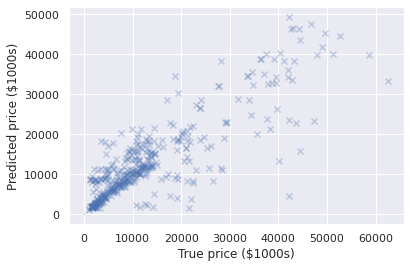

In [ ]:
plt.scatter(y_test, y_model , alpha = 0.3, marker = 'x')
plt.plot([0, 50], [0, 50], "--k")
plt.axis("tight")
plt.xlabel("True price ($1000s)")
plt.ylabel("Predicted price ($1000s)")

# 7. Mostrar app Web con API

Podría haber usado el modelo exportado anteriormente, pero de esta manera no tengo que cambiar librerías ni nombres en el código de la API

In [ ]:
# Grabamos el modelo en el directorio
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(clf, file)

### Transformación de X_train y_train a array para evitar el Warning al probar el modelo

In [ ]:
"""X_train = X_train.values # conversion of X  into array
y_train = y_train.values # conversion of X  into array"""

### Probando el modelo

* Edad (nº)
* Sexo (male=1 | female=2)
* Índice de masa corporal (nº)
* Cantidad de hijos (nº)
* Fumador (no=0 | yes=1)
* Región (noreste=1 | noroeste=2 | sureste=3 | sur oeste=4)

(Los modelos con variables escaladas dan números enteros entre 1 y 4 más o menos
y los modelos SIN datos escalados dan resultados algo más reales pero igualmente erroneos, números enteros de 4 o 5 cifras)

In [ ]:
x_in = np.asarray([18, 1, 31, 0, 0, 3]).reshape(1,-1)
predicts = model.predict(x_in)
predicts[0]

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


28299.666666666668

In [ ]:
x_in = np.asarray([20, 2, 50, 3, 0, 4]).reshape(1,-1)
predicts = model.predict(x_in)
predicts[0]

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


10889.0

In [ ]:
x_in = np.asarray([50, 1, 90, 3, 1, 4]).reshape(1,-1)
predicts = model.predict(x_in)
predicts[0]

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


28299.666666666668